In [169]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import os
sns.set()

output_dir = 'resultados'

In [170]:
# Load dataset
gastos_diretos = pd.read_csv('../databases/gastosdiretos_clean.csv', encoding='latin1')

## Gastos por ano

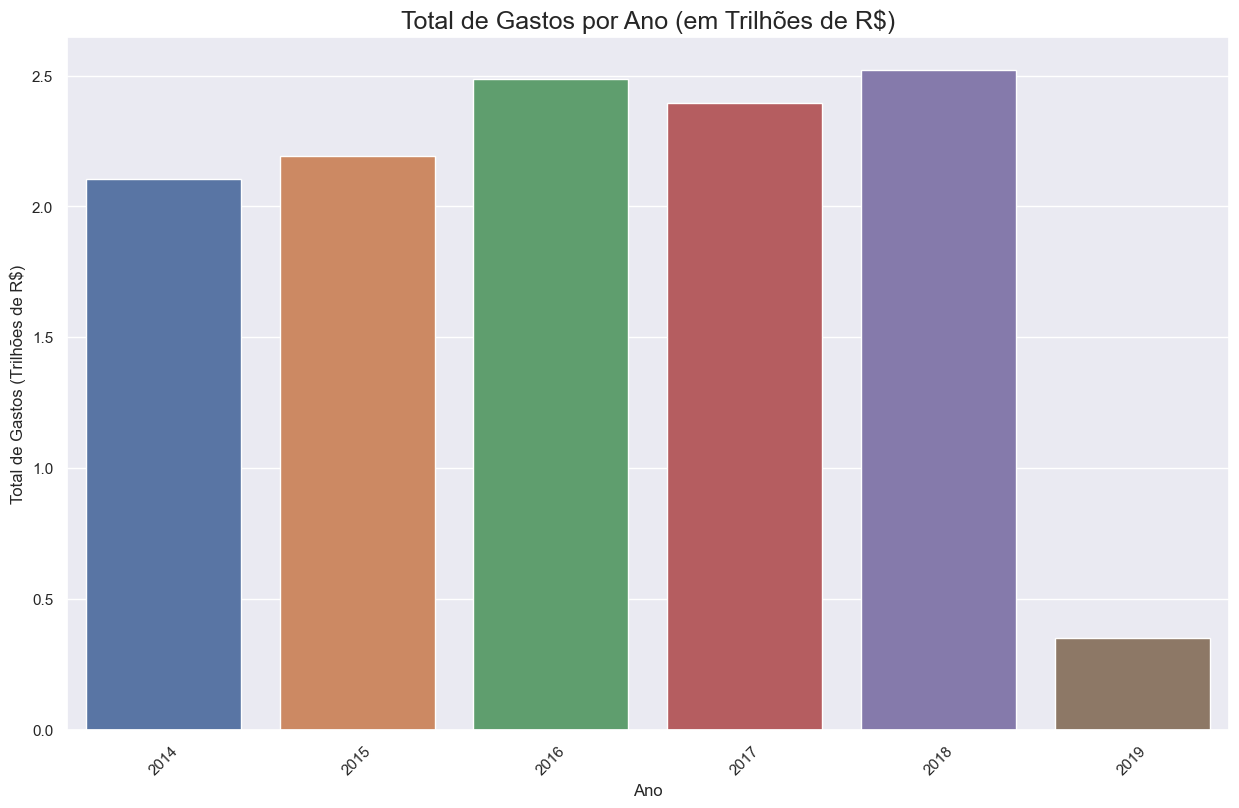

In [171]:
gastos_por_ano = (gastos_diretos.groupby('ANO')
                  .agg({'ORCAMENTO_REALIZADO_R$': 'sum'})
                  .reset_index()
                  .rename(columns={'ORCAMENTO_REALIZADO_R$': 'total_expenditure'}))

sns.barplot(
    x=gastos_por_ano['ANO'],
    y=gastos_por_ano['total_expenditure'] / 1e12
)

plt.title("Total de Gastos por Ano (em Trilhões de R$)", fontsize=18)
plt.xlabel('Ano')
plt.ylabel('Total de Gastos (Trilhões de R$)')
plt.xticks(rotation=45)
plt.savefig('../resultados/gastos_por_ano.png', bbox_inches='tight')
plt.show()

## Top 5 funções com maiores gastos

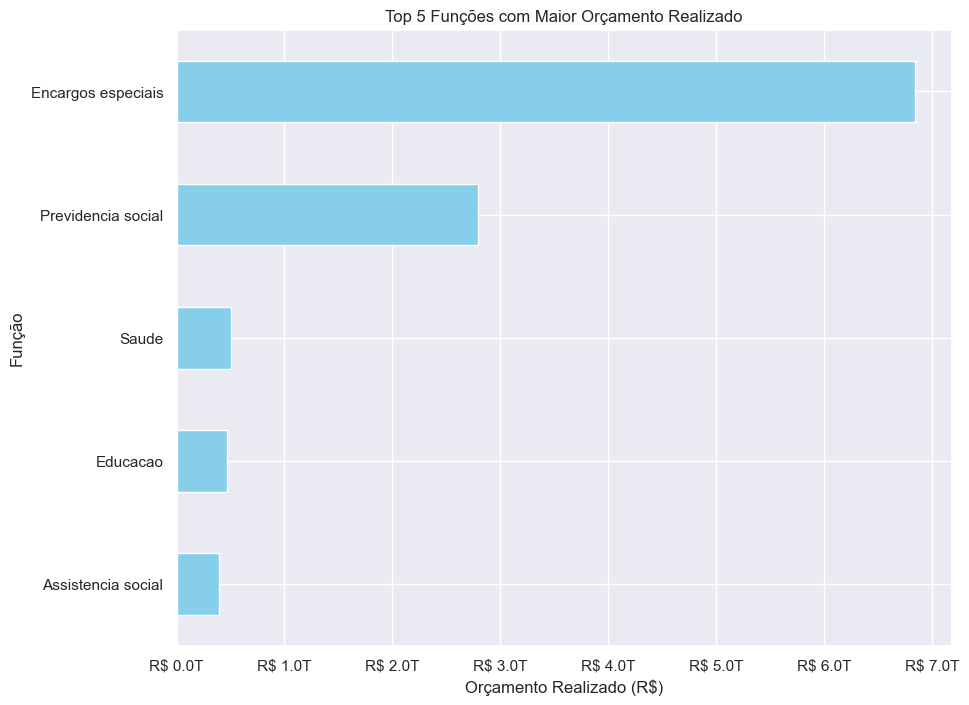

O órgão que mais gastou com "Encargos especiais" foi Ministerio da Fazenda com um gasto de R$ 6.48 trilhões.


In [172]:
funcao_gastos = gastos_diretos.groupby('NOME_FUNCAO')['ORCAMENTO_REALIZADO_R$'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 8))
funcao_gastos.plot(kind='barh', color='skyblue')
plt.xlabel('Orçamento Realizado (R$)')
plt.ylabel('Função')
plt.title('Top 5 Funções com Maior Orçamento Realizado')
plt.gca().invert_yaxis()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R$ {x / 1e12:.1f}T'))
plt.savefig('../resultados/top5_funcoes.png', bbox_inches='tight')
plt.show()

encargos_especiais = gastos_diretos[gastos_diretos['NOME_FUNCAO'] == 'Encargos especiais']
orgaos_gastos_encargos = encargos_especiais.groupby('NOME_ORGAO_SUPERIOR')['ORCAMENTO_REALIZADO_R$'].sum()


orgao_max_gasto = orgaos_gastos_encargos.idxmax()
max_gasto = orgaos_gastos_encargos.max()
print(f'O órgão que mais gastou com "Encargos especiais" foi {orgao_max_gasto} com um gasto de R$ {max_gasto / 1e12:.2f} trilhões.')

## Top 10 órgãos com maiores gastos realizados

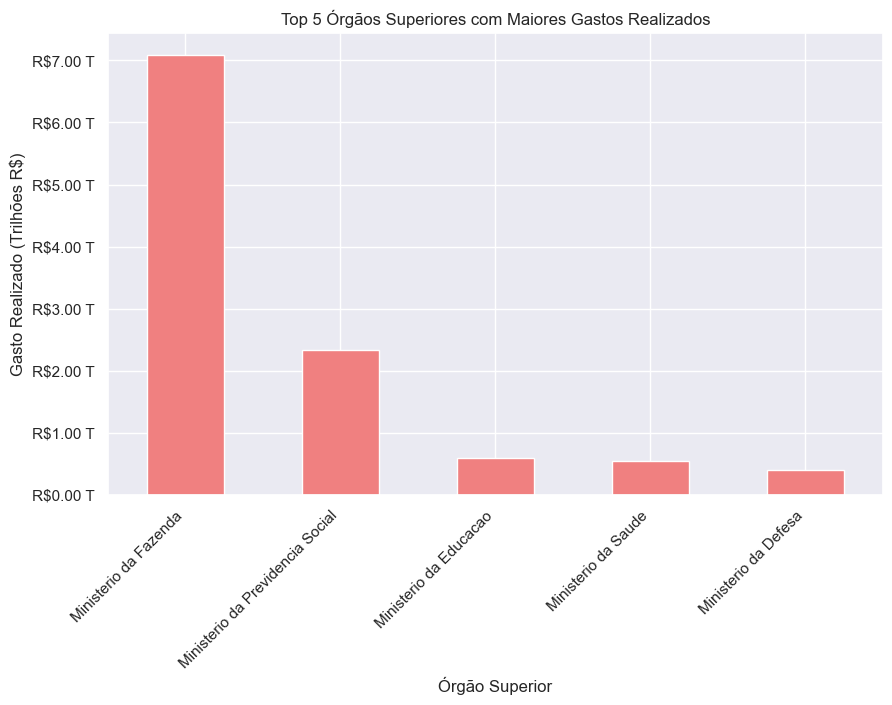

In [173]:
top_orgaos_superiores = gastos_diretos.groupby('NOME_ORGAO_SUPERIOR')['ORCAMENTO_REALIZADO_R$'].sum().nlargest(5)

top_orgaos_superiores_trilhoes = top_orgaos_superiores / 1e12

plt.figure(figsize=(10, 6))
top_orgaos_superiores_trilhoes.plot(kind='bar', color='lightcoral')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R${x:.2f} T'))
plt.title('Top 5 Órgãos Superiores com Maiores Gastos Realizados')
plt.xlabel('Órgão Superior')
plt.ylabel('Gasto Realizado (Trilhões R$)')
plt.xticks(rotation=45, ha='right')
plt.savefig('../resultados/top5_orgaos.png', bbox_inches='tight')
plt.show()